# Sentiment Analysis

In [40]:
# importing libraries 
from nltk.tokenize import word_tokenize,sent_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import contractions
from unidecode import unidecode
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from autocorrect import Speller
import pandas as pd 
from gensim.models import Word2Vec
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
data = pd.read_csv("Train.csv")
data.head(10)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


In [63]:
# wordcloud  : ""
def generate_wordcloud(data,column):
    df = data[column].str.cat(sep=" ") # record1   record 2 
    text = " ".join([word for word in df.split()])# 
    word_cloud = WordCloud(height=500,width=700,background_color='white',min_font_size=10).generate(text)
    plt.figure(figsize=(10,16))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

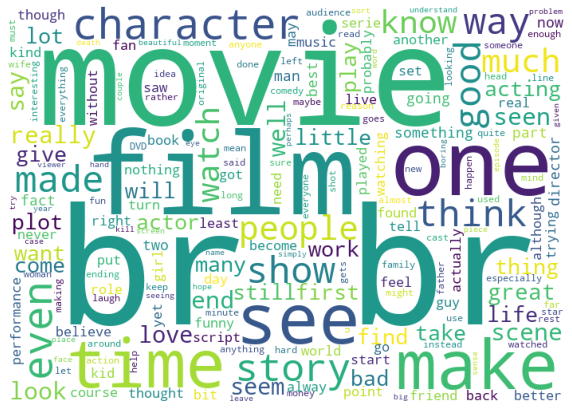

In [64]:
generate_wordcloud(data,'text')

In [3]:
# 1. remove blanklines,whitespaces,tabs
# 2. contraction mapping 
# 3. Handling accented characters
# 4. Cleaning : tokenization,remove punctuation,normalization,stopwords removal,remove numerical format,len(word)<2 removed
# 5. autocorrect 
# 6. stemming and lemmatization 

In [60]:
# 1. remove blanklines,whitespaces,tabs 
def remove_spaces(data):
    "Function will remove all spaces"
    formatted_text = data.replace('\\n',' ').replace('\t',' ').replace("\\",' ')
    return formatted_text 
# 2. Contraction mapping 
def expand_text(data):
    fixed_text = contractions.fix(data)
    return fixed_text

# 3. Handling accented 
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text
# 4.cleaning 
stopword_list = stopwords.words("english")
stopword_list.remove("not")
stopword_list.remove("nor")
stopword_list.remove("no")
def cleaning(data):
    tokens = word_tokenize(data) # tokenization
    clean_text = [word.lower() for word in tokens if (word not in stopword_list) and(word not in punctuation) and(len(word)>2) and(word.isalpha())]
    return clean_text

# 5. autocorrect 
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# 6. Lemmatization 
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_text.append(lemmatized_word)
    return " ".join(final_text)

In [5]:
# data leakage 
x_train,x_test,y_train,y_test = train_test_split(data.text,data.label,test_size=0.25,random_state=45)

In [9]:
# preprocessing 
clean_text_train = x_train.apply(remove_spaces)
clean_text_test = x_test.apply(remove_spaces)

clean_text_train = clean_text_train.apply(expand_text)
clean_text_test = clean_text_test.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented)
clean_text_test = clean_text_test.apply(handling_accented)

clean_text_train = clean_text_train.apply(cleaning)
clean_text_test = clean_text_test.apply(cleaning)

clean_text_train = clean_text_train.apply(lemmatization)
clean_text_test = clean_text_test.apply(lemmatization)

In [10]:
def filter_2(data):
    tokens = data.split()
    clean_text = [word for word in tokens if word not in stopword_list]
    return " ".join(clean_text)
clean_text_train = clean_text_train.apply(filter_2)
clean_text_test = clean_text_test.apply(filter_2)

In [65]:
# implememtation of ngrams 
from nltk.util import ngrams
for unigrams in ngrams(clean_text_train[11449].split(),2):
    print(" ".join(unigrams))

saw wonderful
wonderful world
world disney
disney kid
kid not
not recall
recall much
much watched
watched recently
recently sat
sat thinking
thinking weirdest
weirdest thing
thing seen
seen scene
scene look
look like
like something
something caused
caused lsd
lsd overdose
overdose animated
animated character
character mostly
mostly oddly
oddly version
version jungle
jungle book
book robin
robin hood
hood character
character thing
thing noticed
noticed kid
kid threatened
threatened knife
knife point
point prostitute
prostitute portobello
portobello road
road song
song entertaining
entertaining though
though musical
musical number
number long
long see
see little
little kid
kid getting
getting bored
bored also
also subject
subject manner
manner bit
bit dark
dark seeing
seeing set


In [11]:
# Count vectorizer 
count = CountVectorizer(max_df = 0.95,max_features=1000)
count_val_train =count.fit_transform(clean_text_train)
count_val_test = count.transform(clean_text_test)

In [13]:
len(count.get_feature_names())

1000

In [14]:
pd.DataFrame(count_val_train.A,columns=count.get_feature_names())

,ability,able,absolutely,accent,across,act,acted,acting,action,actor,...,wrong,wrote,yeah,year,yes,yet,york,young,younger,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
count_mnb = MultinomialNB()
count_mnb.fit(count_val_train.A,y_train) 
predict_mnb = count_mnb.predict(count_val_test.A)
accuracy_count = accuracy_score(y_test,predict_mnb)*100
accuracy_count

83.35000000000001

In [16]:
# TFIDF 
tfidf = TfidfVectorizer(max_df = 0.95,max_features=1000)
tfidf_train = tfidf.fit_transform(clean_text_train)
tfidf_test = tfidf.transform(clean_text_test)

In [17]:
len(tfidf.get_feature_names())

1000

In [18]:
pd.DataFrame(tfidf_train.A,columns=tfidf.get_feature_names())

,ability,able,absolutely,accent,across,act,acted,acting,action,actor,...,wrong,wrote,yeah,year,yes,yet,york,young,younger,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.134369,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116764,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.048491,0.000000,0.0,0.034232,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.175922,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.044412,0.058271,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


In [19]:
tfidf_mnb = MultinomialNB()
tfidf_mnb.fit(tfidf_train.A,y_train)
predict_tfidf = tfidf_mnb.predict(tfidf_test.A)
accuracy_tfidf = accuracy_score(y_test,predict_tfidf)*100
print(f" accuracy_tfidf {accuracy_tfidf}")
print(f" accuracy_count {accuracy_count}")

 accuracy_tfidf 83.65
 accuracy_count 83.35000000000001
